In [52]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from scipy.stats import kurtosis


In [53]:
df = pd.read_csv('cancer.csv')

In [61]:
print(df.head(5))

   Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    5          1           1          1          2          1       3   
1      0    5          4           4          5          7         10       3   
2      0    3          1           1          1          2          2       3   
3      0    6          8           8          1          3          4       3   
4      0    4          1           1          3          2          1       3   

   breast-quad  irradiat  
0            1         1  
1            2         1  
2            1         1  
3            7         1  
4            1         1  


In [55]:
print("DataFrame Info:", df.info()) # index & data types

print("\nMemory usage\n", df.memory_usage(deep=True) / 1024 ** 2)

n = 4
dfh = df.head(n) # get first n rows
print(f"\nFirst {n} rows of the DataFrame:\n", dfh)


dfs = df.describe() # summary stats cols
print("\nSummary statistics of the DataFrame:\n", dfs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB
DataFrame Info: None

Memory usage
 Index          0.000126
Class          0.005211
age            0.005211
menopause      0.005211
tumor-size     0.005211
inv-nodes      0.005211
node-caps      0.005211
deg-malig      0.005211
breast         0.005211
breast-quad    0.005211
irradiat       0.005211
dtype: float64

First 4 rows of the DataFrame:
    Class  age  menopause  t

In [56]:
dfc = df.copy() # copy a DataFrame
dfr = df.rank() # rank each col (default)

print (dfr)

     Class    age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  \
0    222.5  436.5      187.0       173.5      197.0      232.5      201.5   
1    222.5  436.5      489.5       479.0      554.0      624.0      617.5   
2    222.5  241.5      187.0       173.5      197.0      232.5      417.5   
3    222.5  517.0      596.5       605.0      197.0      456.0      470.0   
4    222.5  333.0      187.0       173.5      480.5      232.5      201.5   
..     ...    ...        ...         ...        ...        ...        ...   
678  222.5  241.5      187.0       173.5      197.0      456.0      417.5   
679  222.5  164.5      187.0       173.5      197.0      232.5      201.5   
680  564.0  436.5      650.0       654.5      480.5      624.0      446.5   
681  564.0  333.0      596.5       547.0      526.0      456.0      470.0   
682  564.0  333.0      596.5       605.0      554.0      515.5      494.5   

     breast  breast-quad  irradiat  
0     391.0        216.5     282.0  
1

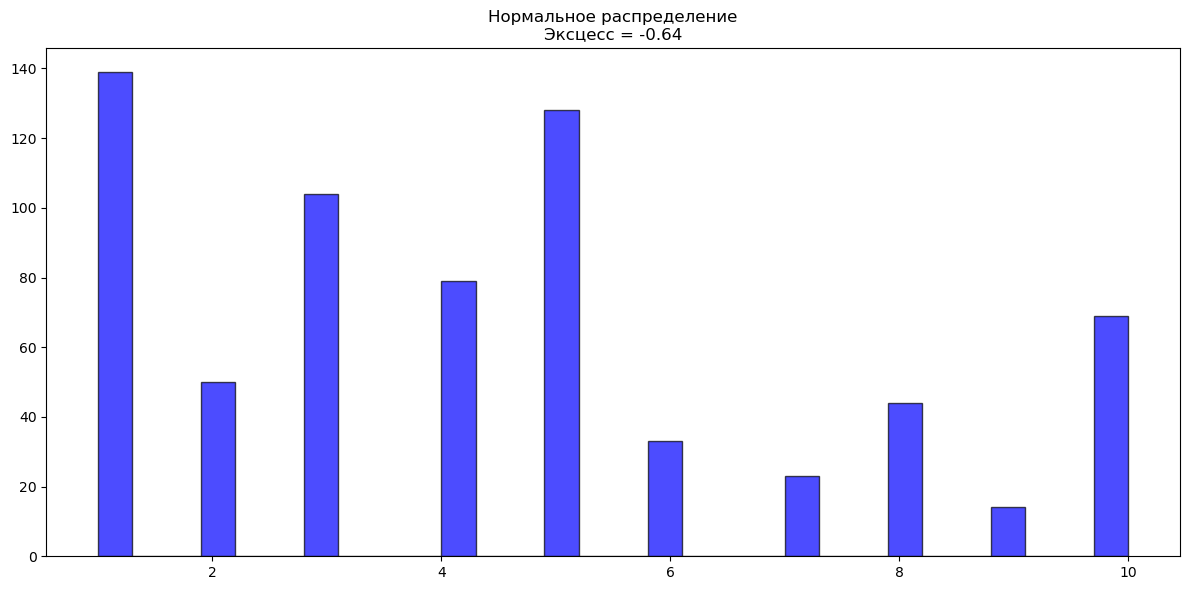

In [60]:

# Данные

s = df['age']
# Эксцессы
kurt1 = kurtosis(s, fisher=True)  # Нормальное

# Графики
plt.figure(figsize=(12, 6))

# Нормальное распределение
plt.plot()
plt.hist(s, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Нормальное распределение\nЭксцесс = {kurt1:.2f}')

plt.tight_layout()
plt.show()


In [63]:
col1 = df['tumor-size']
col2 = df['Class']
col3 = df['age']

# Создание и обучение модели
result = sm.ols(formula="col1 ~ col2 + col3", data=df).fit()

# Коэффициенты
print("Коэффициенты модели:")
print(result.params)

# Сводка
print("\nСводка модели:")
print(result.summary())


Коэффициенты модели:
Intercept    0.990695
col2         4.542359
col3         0.142957
dtype: float64

Сводка модели:
                            OLS Regression Results                            
Dep. Variable:                   col1   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     737.3
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          5.04e-171
Time:                        14:47:05   Log-Likelihood:                -1322.5
No. Observations:                 683   AIC:                             2651.
Df Residuals:                     680   BIC:                             2665.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [67]:
count, bins = np.histogram(df['age'])

print("Количество в каждом бине:", count)
print("Границы бинов:", bins)

# count, bins = np.histogram(df['age'],
#  bins=5)
# count, bins = np.histogram(df['col1'], 
#  bins=[-3,-2,-1,0,1,2,3,4])

Количество в каждом бине: [139  50 104  79 128  33  23  44  14  69]
Границы бинов: [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]
